In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 300 samples
n_samples = 300

# --- Input Features (X) ---
data = {
    # IT Infrastructure
    "critical_systems": np.random.randint(5, 50, n_samples),
    "patch_compliance_rate": np.random.normal(80, 10, n_samples).clip(40, 100),
    "endpoint_security_score": np.random.normal(70, 15, n_samples).clip(30, 100),

    # Access Control
    "privileged_accounts": np.random.randint(10, 100, n_samples),
    "mfa_coverage": np.random.normal(65, 20, n_samples).clip(10, 100),

    # Historical Incidents
    "past_incidents": np.random.poisson(2, n_samples),
    "mttd_hours": np.random.exponential(50, n_samples).clip(1, 200),

    # External Threats
    "phishing_attacks": np.random.poisson(10, n_samples),
    "dark_web_exposure": np.random.binomial(1, 0.3, n_samples),

    # Organizational Factors
    "training_hours": np.random.normal(4, 1.5, n_samples).clip(0, 10),
    "vendor_risk_score": np.random.uniform(3, 8, n_samples),

    # Financial Exposure
    "transaction_volume": np.random.lognormal(0, 0.5, n_samples).round(2),
    "cyber_insurance": np.random.uniform(10, 100, n_samples),
}

# --- Target (Y): Financial Loss ---
# Simulate loss as a function of features + noise
X = pd.DataFrame(data)
noise = np.random.normal(0, 0.5, n_samples)
data["financial_loss"] = (
    0.1 * X["critical_systems"] +
    0.05 * (100 - X["patch_compliance_rate"]) +
    0.03 * (100 - X["endpoint_security_score"]) +
    0.2 * X["past_incidents"] +
    0.01 * X["phishing_attacks"] +
    0.5 * X["dark_web_exposure"] +
    0.02 * X["transaction_volume"] -
    0.01 * X["cyber_insurance"] +
    noise
).clip(0.1, 10).round(2)  # Loss between $0.1M and $10M

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("cyber_risk_dataset.csv", index=False)
print(df.head())

   critical_systems  patch_compliance_rate  endpoint_security_score  \
0                43              84.244862                70.429308   
1                33              89.405356                84.529347   
2                19              71.323589                55.415972   
3                47              81.458619                71.192237   
4                12              66.301289                92.856811   

   privileged_accounts  mfa_coverage  past_incidents  mttd_hours  \
0                   96     39.393912               1   96.194410   
1                   89     82.449147               0   28.915073   
2                   79     78.004024               2   93.855691   
3                   81     63.016483               1  111.788492   
4                   34    100.000000               0    3.224664   

   phishing_attacks  dark_web_exposure  training_hours  vendor_risk_score  \
0                13                  0        1.728295           6.298451   
1         

In [ ]:
df.head()

,critical_systems,patch_compliance_rate,endpoint_security_score,privileged_accounts,mfa_coverage,past_incidents,mttd_hours,phishing_attacks,dark_web_exposure,training_hours,vendor_risk_score,transaction_volume,cyber_insurance,financial_loss
0,43,84.244862,70.429308,96,39.393912,1,96.194410,13,0,1.728295,6.298451,1.18,82.458758,4.74
1,33,89.405356,84.529347,89,82.449147,0,28.915073,10,0,4.482390,5.210167,0.89,86.053568,2.24
2,19,71.323589,55.415972,79,78.004024,2,93.855691,7,1,6.632400,6.241167,0.66,45.554800,5.39
3,47,81.458619,71.192237,81,63.016483,1,111.788492,12,0,4.027602,3.307231,0.70,14.613711,6.63
4,12,66.301289,92.856811,34,100.000000,0,3.224664,11,0,4.337896,7.068617,2.79,46.168864,2.55


## Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   critical_systems         300 non-null    int64  
 1   patch_compliance_rate    300 non-null    float64
 2   endpoint_security_score  300 non-null    float64
 3   privileged_accounts      300 non-null    int64  
 4   mfa_coverage             300 non-null    float64
 5   past_incidents           300 non-null    int64  
 6   mttd_hours               300 non-null    float64
 7   phishing_attacks         300 non-null    int64  
 8   dark_web_exposure        300 non-null    int64  
 9   training_hours           300 non-null    float64
 10  vendor_risk_score        300 non-null    float64
 11  transaction_volume       300 non-null    float64
 12  cyber_insurance          300 non-null    float64
 13  financial_loss           300 non-null    float64
dtypes: float6

,critical_systems,patch_compliance_rate,endpoint_security_score,privileged_accounts,mfa_coverage,past_incidents,mttd_hours,phishing_attacks,dark_web_exposure,training_hours,vendor_risk_score,transaction_volume,cyber_insurance,financial_loss
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,27.206667,81.072320,69.041771,54.010000,66.833169,2.033333,50.254935,10.026667,0.270000,4.004352,5.430380,1.072300,55.133680,4.630033
std,13.241920,9.847618,15.269798,25.871497,19.651223,1.434952,48.733910,3.184298,0.444701,1.553750,1.426825,0.556507,25.439425,1.613183
min,5.000000,55.477354,30.000000,11.000000,10.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.020937,0.310000,10.084907,0.430000
25%,15.000000,75.134968,58.949949,32.000000,53.387662,1.000000,14.811430,8.000000,0.000000,2.804707,4.097245,0.680000,34.504946,3.367500
50%,28.000000,80.755856,69.287084,54.000000,67.423288,2.000000,33.995710,10.000000,0.000000,4.112378,5.543510,0.965000,55.315410,4.700000
75%,39.000000,88.724708,79.315472,76.000000,80.504481,3.000000,73.317177,12.000000,1.000000,5.116170,6.506271,1.302500,76.516789,5.835000
max,49.000000,100.000000,100.000000,99.000000,100.000000,6.000000,200.000000,21.000000,1.000000,8.302605,7.984747,5.060000,98.618903,8.350000



## Missing Values per Column:
critical_systems           0
patch_compliance_rate      0
endpoint_security_score    0
privileged_accounts        0
mfa_coverage               0
past_incidents             0
mttd_hours                 0
phishing_attacks           0
dark_web_exposure          0
training_hours             0
vendor_risk_score          0
transaction_volume         0
cyber_insurance            0
financial_loss             0
dtype: int64

## Number of Unique Values per Column:
critical_systems            45
patch_compliance_rate      293
endpoint_security_score    291
privileged_accounts         86
mfa_coverage               285
past_incidents               7
mttd_hours                 286
phishing_attacks            19
dark_web_exposure            2
training_hours             300
vendor_risk_score          300
transaction_volume         147
cyber_insurance            300
financial_loss             235
dtype: int64

## Histograms of Numerical Features:


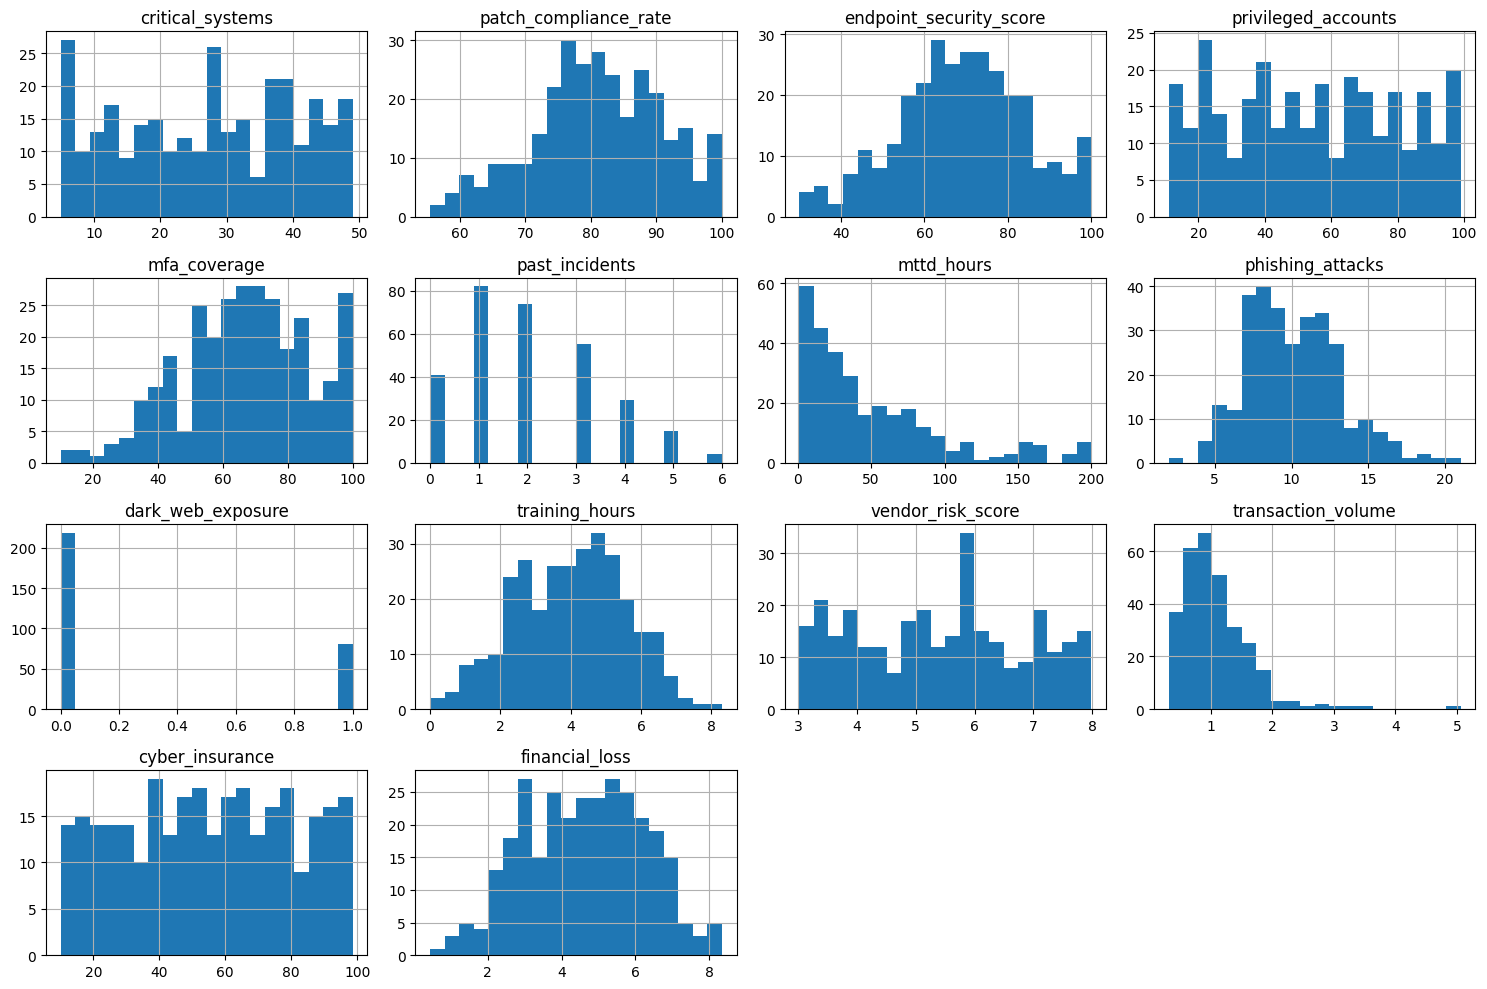


## Box Plots of Numerical Features:


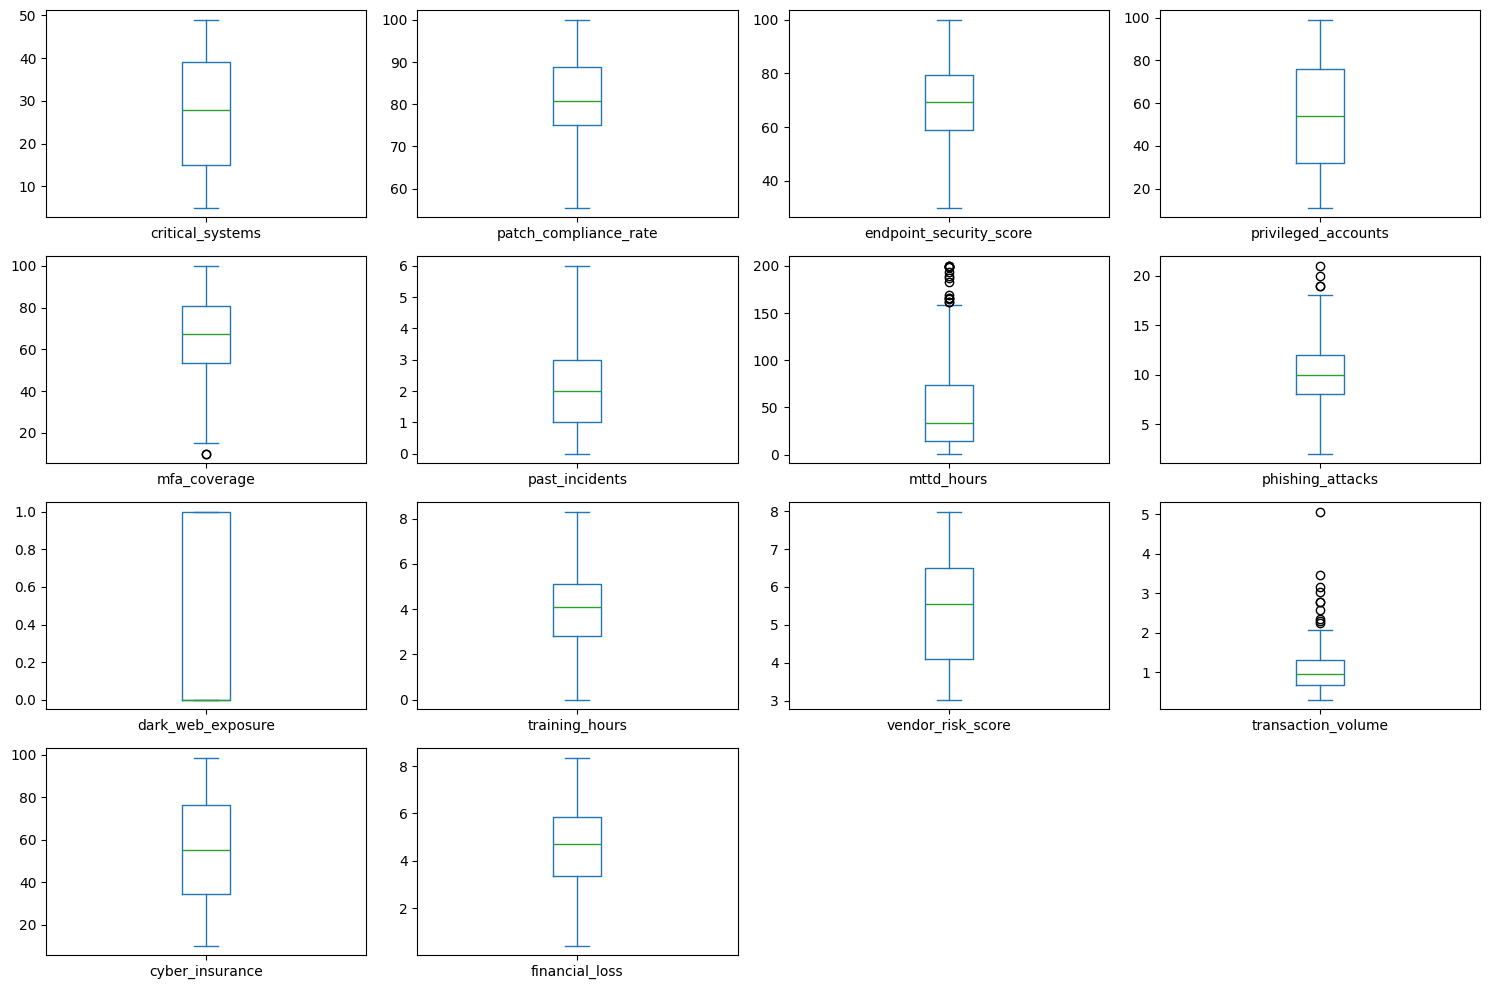


## Correlation Matrix:


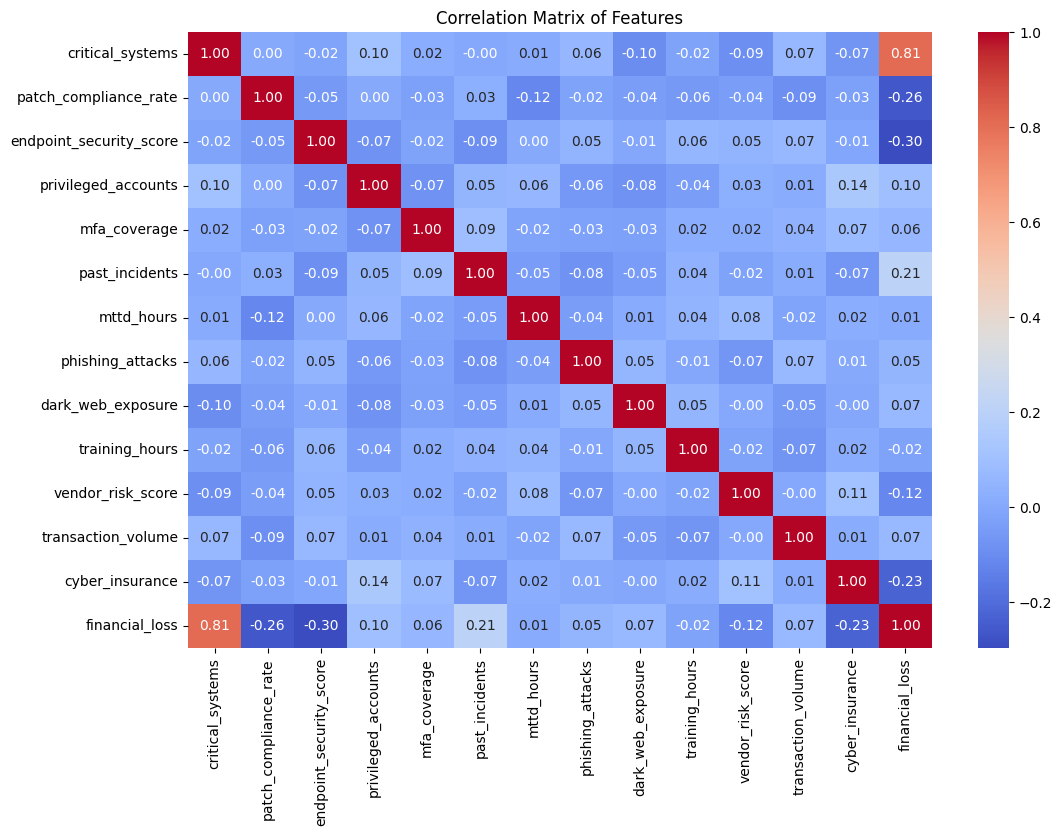


## Distribution of Financial Loss:


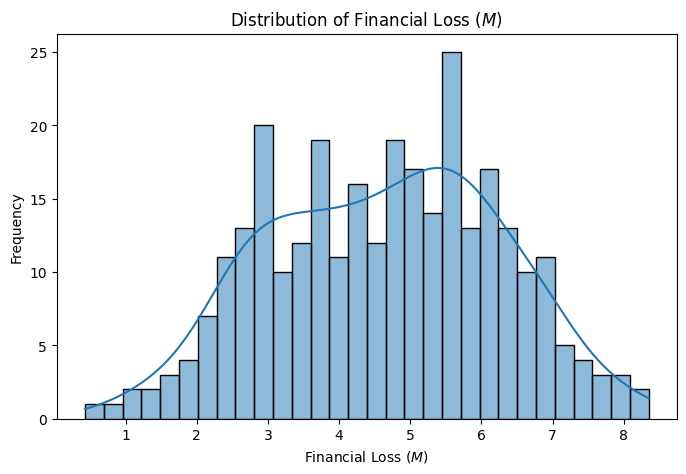


## Feature Relationships with Financial Loss:


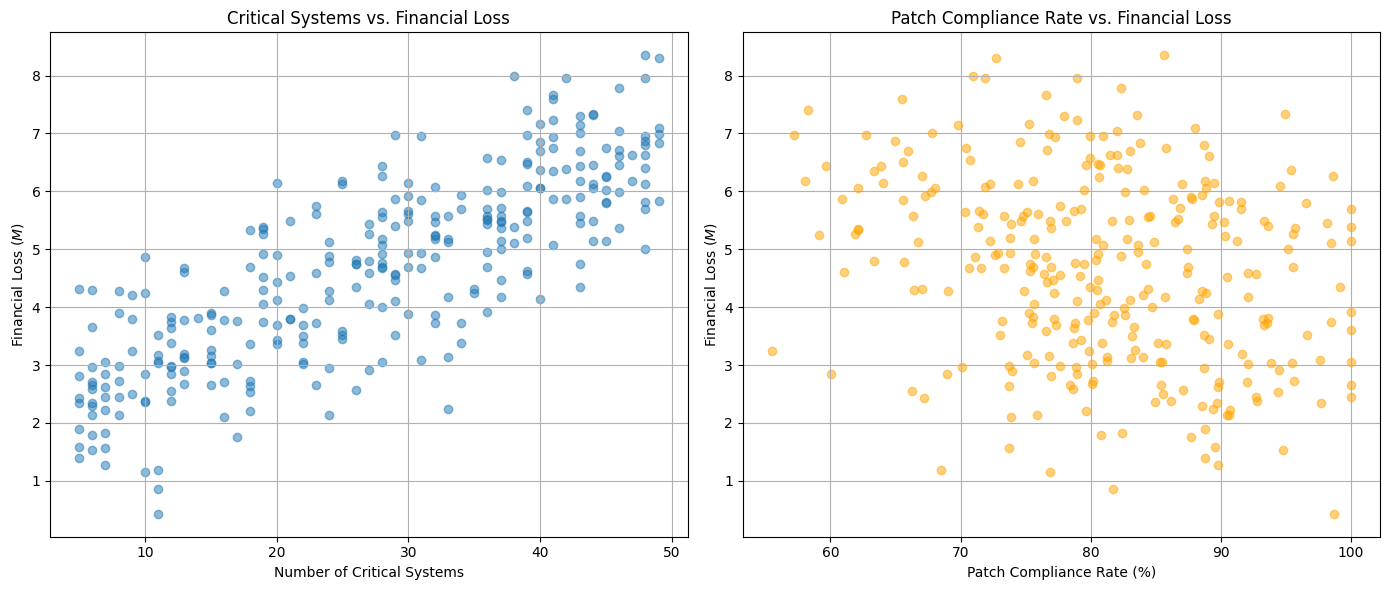

In [ ]:
# %% [markdown]
# ## Data Exploration
# %%
import matplotlib.pyplot as plt # Import matplotlib if not already imported
import pandas as pd # Import pandas if not already imported
import numpy as np # Import numpy if not already imported
import seaborn as sns # Import seaborn for statistical plotting

# Ensure df is loaded or available from previous cells
# If df is not defined, you might need to load it again, e.g.:
# try:
#     df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Minister/cyber_risk_dataset.csv")
# except FileNotFoundError:
#     print("Error: 'cyber_risk_dataset.csv' not found. Cannot perform data exploration.")
#     # Handle this case, perhaps by skipping this cell or using a dummy df
#     # For this fix, we assume df is available from a previous cell execution

# Display basic information about the dataset
print("## Dataset Info:")
print(df.info())

# Display descriptive statistics for numerical columns
print("\n## Descriptive Statistics:")
display(df.describe())

# Check for missing values
print("\n## Missing Values per Column:")
print(df.isnull().sum())

# Display the number of unique values in each column
print("\n## Number of Unique Values per Column:")
print(df.nunique())

# Plot histograms for numerical features
print("\n## Histograms of Numerical Features:")
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Plot box plots for numerical features to check for outliers
print("\n## Box Plots of Numerical Features:")
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# Plot a correlation matrix heatmap
print("\n## Correlation Matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Analyze the distribution of the target variable
print("\n## Distribution of Financial Loss:")
plt.figure(figsize=(8, 5))
sns.histplot(df['financial_loss'], kde=True, bins=30)
plt.title("Distribution of Financial Loss ($M$)")
plt.xlabel("Financial Loss ($M$)")
plt.ylabel("Frequency")
plt.show()

# You can also explore relationships between specific features and the target variable
# For example, scatter plot of critical systems vs financial loss
print("\n## Feature Relationships with Financial Loss:")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns

# Plot Critical Systems vs. Financial Loss on the first subplot
axes[0].scatter(df['critical_systems'], df['financial_loss'], alpha=0.5)
axes[0].set_xlabel("Number of Critical Systems")
axes[0].set_ylabel("Financial Loss ($M$)")
axes[0].set_title("Critical Systems vs. Financial Loss")
axes[0].grid(True)

# Plot Patch Compliance Rate vs. Financial Loss on the second subplot
axes[1].scatter(df['patch_compliance_rate'], df['financial_loss'], alpha=0.5, color='orange')
axes[1].set_xlabel("Patch Compliance Rate (%)")
axes[1].set_ylabel("Financial Loss ($M$)") # Redundant label but kept for clarity per subplot
axes[1].set_title("Patch Compliance Rate vs. Financial Loss")
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
plt.show() # Display the combined figure

# Removed the previous separate plots for these two visualizations
# print("\n## Critical Systems vs. Financial Loss:")
# plt.figure(figsize=(8, 5))
# plt.scatter(df['critical_systems'], df['financial_loss'], alpha=0.5)
# plt.xlabel("Number of Critical Systems")
# plt.ylabel("Financial Loss ($M$)")
# plt.title("Critical Systems vs. Financial Loss")
# plt.grid(True)
# plt.show()

# # Scatter plot of patch compliance rate vs financial loss
# print("\n## Patch Compliance Rate vs. Financial Loss:")
# plt.figure(figsize=(8, 5))
# plt.scatter(df['patch_compliance_rate'], df['financial_loss'], alpha=0.5)
# plt.xlabel("Patch Compliance Rate (%)")
# plt.ylabel("Financial Loss ($M$)")
# plt.title("Patch Compliance Rate vs. Financial Loss")
# plt.grid(True)
# plt.show()

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
df = pd.read_csv("cyber_risk_dataset.csv")
X = df.drop(columns=["financial_loss"]).values
y = df["financial_loss"].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define Dual-Output BNN
class BNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc_mean = nn.Linear(32, 1)    # Predicts mean (μ)
        self.fc_var = nn.Linear(32, 1)     # Predicts variance (σ²)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        mean = self.fc_mean(x)             # μ
        var = torch.exp(self.fc_var(x))    # σ² (ensures positivity)
        return torch.cat([mean, var], dim=1)

# Initialize model
model = BNN(input_dim=X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Custom loss: Negative Log Likelihood (NLL) for Gaussian
def nll_loss(y_true, y_pred):
    mean, var = y_pred[:, 0], y_pred[:, 1]
    return 0.5 * torch.mean(torch.log(var) + (y_true - mean)**2 / var)  # Fixed parenthesis

# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = nll_loss(y_train, y_pred)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.2f}")

# Evaluate
with torch.no_grad():
    y_pred = model(X_test)
    mean, var = y_pred[:, 0], y_pred[:, 1]
    std = torch.sqrt(var)

    # Classify into Low/Medium/High
    y_range = []
    for i in range(len(mean)):  # Fixed: Added loop index 'i'
        if mean[i] - std[i] <= y_test[i] < mean[i]:
            y_range.append("Low")
        elif mean[i] <= y_test[i] < mean[i] + std[i]:
            y_range.append("Medium")
        else:
            y_range.append("High")

# Print results
print("\nTest Predictions:")
for i in range(5):  # Show first 5 samples
    print(f"True Loss: {y_test[i].item():.2f}M, Pred: μ={mean[i].item():.2f} ± σ={std[i].item():.2f} → {y_range[i]}")

Epoch 0, Loss: 11.93
Epoch 100, Loss: 0.99
Epoch 200, Loss: 0.98
Epoch 300, Loss: 0.98
Epoch 400, Loss: 0.98
Epoch 500, Loss: 0.98
Epoch 600, Loss: 0.98
Epoch 700, Loss: 0.98
Epoch 800, Loss: 0.98
Epoch 900, Loss: 0.98

Test Predictions:
True Loss: 5.27M, Pred: μ=4.57 ± σ=1.60 → Medium
True Loss: 5.15M, Pred: μ=4.63 ± σ=1.62 → Medium
True Loss: 4.18M, Pred: μ=4.61 ± σ=1.60 → Low
True Loss: 2.66M, Pred: μ=3.99 ± σ=1.48 → Low
True Loss: 6.37M, Pred: μ=5.00 ± σ=1.71 → Medium


Is the constructed detailed graph a DAG? True


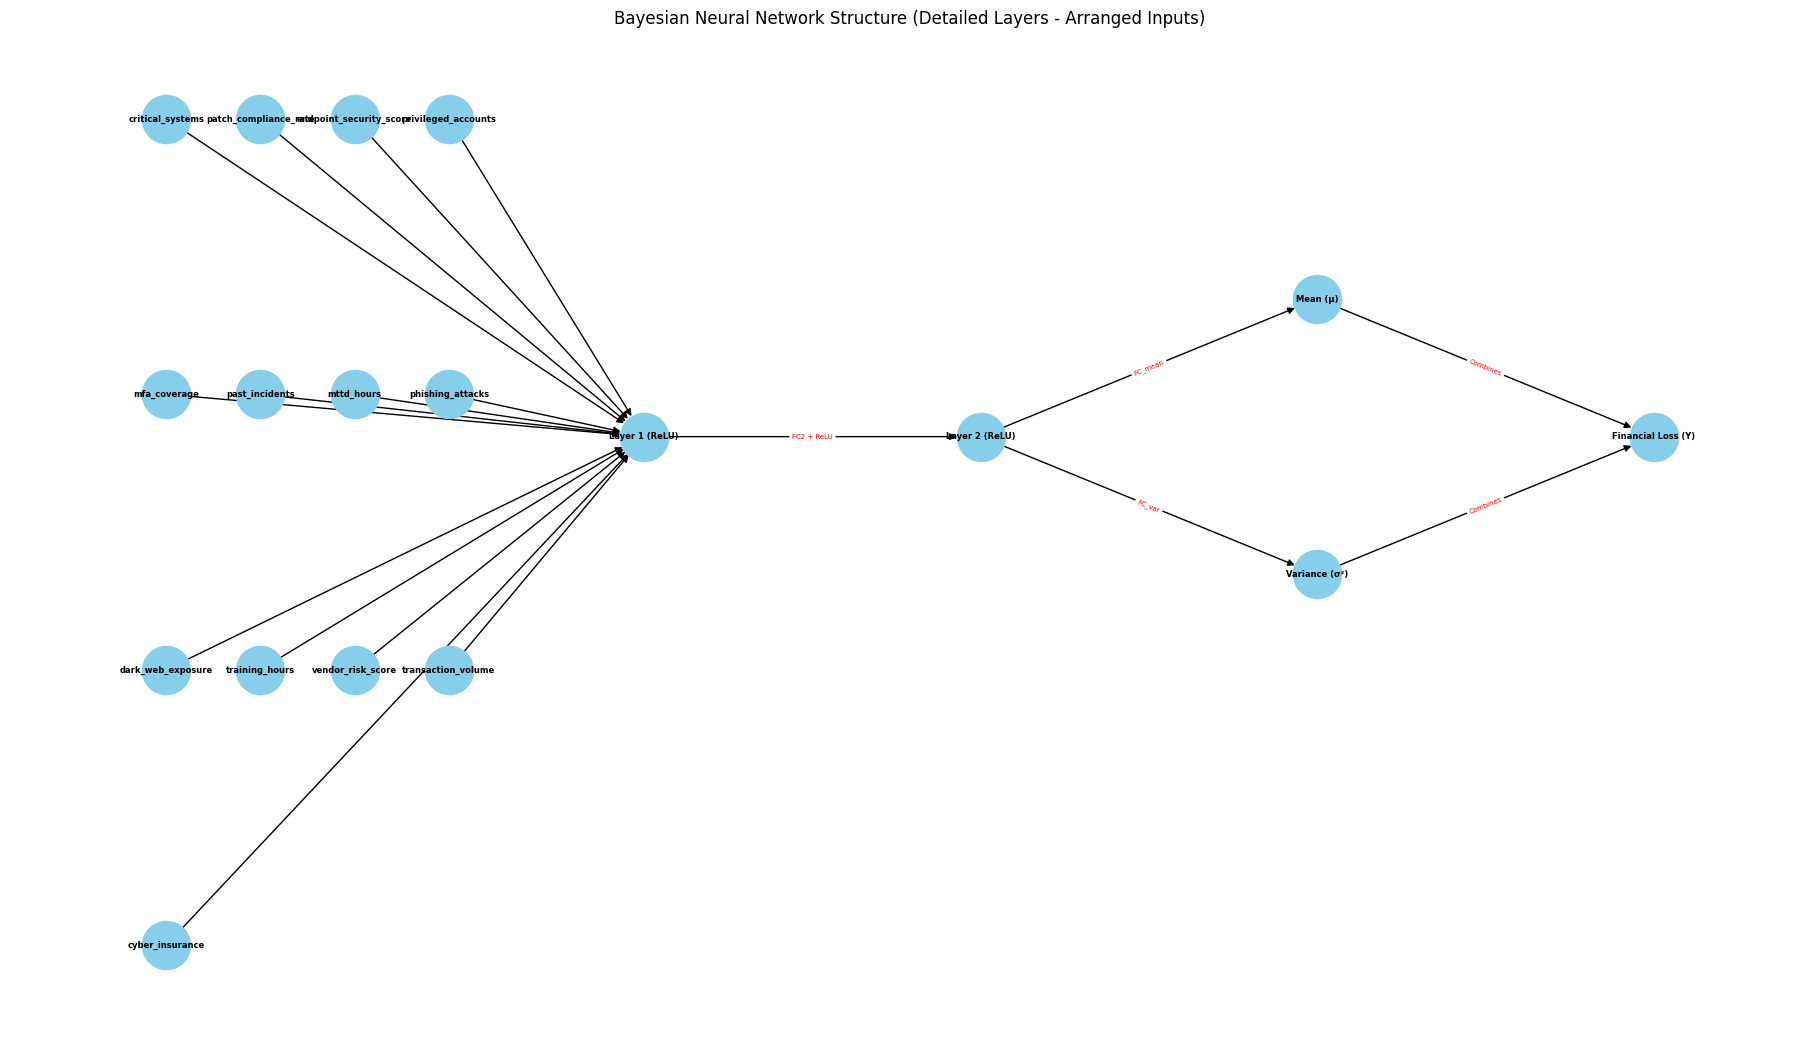

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import os # Import the os module

# ... (Previous imports and graph construction code remain the same)
# --- Define nodes ---
# ... (Node definitions remain the same)
# Verify that the graph is a DAG
# ... (DAG verification remains the same)

# --- Visualize the graph with a layered layout ---
plt.figure(figsize=(18, 10)) # Further adjust figure size for more space

# Manually define positions to simulate a layered layout
pos = {}
layer_spacing = 2.5  # Increase spacing between layers
node_spacing = 0.7   # Adjust spacing within layers

# --- Define nodes for the DETAILED DRAWING ---
# Use individual nodes for each input feature
# Define input_feature_names by getting column names from df (excluding the target)
input_feature_names = [col for col in df.columns if col != 'financial_loss']
input_nodes = input_feature_names

# Hidden Layer nodes (same as before)
hidden_nodes_1 = ["Layer 1 (ReLU)"]
hidden_nodes_2 = ["Layer 2 (ReLU)"]

# Output nodes (same as before)
output_nodes_mean_var = ["Mean (μ)", "Variance (σ²)"]

# Final output node (same as before)
final_output_node = ["Financial Loss (Y)"]

# --- Rebuild the graph G for this specific detailed visualization ---
G_detailed = nx.DiGraph()

# Add nodes to the new graph
nodes_to_draw = input_nodes + hidden_nodes_1 + hidden_nodes_2 + output_nodes_mean_var + final_output_node
G_detailed.add_nodes_from(nodes_to_draw)

# --- Define edges for the DETAILED visualization ---
edges_detailed = []

# Edges from EACH input feature node to the first hidden layer node
for feature_name in input_nodes:
    edges_detailed.append((feature_name, hidden_nodes_1[0])) # No specific label needed for each small edge here

# Edges between hidden layers (same as before)
edges_detailed.append((hidden_nodes_1[0], hidden_nodes_2[0], {"label": "FC2 + ReLU"}))

# Edges from the second hidden layer to the mean and variance outputs (same as before)
edges_detailed.append((hidden_nodes_2[0], output_nodes_mean_var[0], {"label": "FC_mean"}))
edges_detailed.append((hidden_nodes_2[0], output_nodes_mean_var[1], {"label": "FC_var"}))

# Edges from mean and variance to the final output (representing their role in determining Y)
# Adding labels to show the combination (e.g., NLL Loss) (same as before)
edges_detailed.append((output_nodes_mean_var[0], final_output_node[0], {"label": "Combines"}))
edges_detailed.append((output_nodes_mean_var[1], final_output_node[0], {"label": "Combines"}))

# Add edges to the detailed graph
G_detailed.add_edges_from(edges_detailed)

# Verify that the detailed graph is a DAG (optional, but good practice)
is_dag_detailed = nx.is_directed_acyclic_graph(G_detailed)
print(f"Is the constructed detailed graph a DAG? {is_dag_detailed}")

# Position the input layer nodes in a grid-like structure
# You can adjust the number of columns (e.g., 3, 4, or 5) based on the number of features
num_cols = 4  # Example: Arrange input nodes in 4 columns
num_rows = (len(input_nodes) + num_cols - 1) // num_cols # Calculate number of rows

input_x_start = -(num_cols - 1) * node_spacing / 2
input_y_start = (num_rows - 1) * node_spacing / 2

for i, feature_name in enumerate(input_nodes):
    row = i // num_cols
    col = i % num_cols
    # Position each individual input node
    pos[feature_name] = (input_x_start + col * node_spacing, input_y_start - row * node_spacing)

# Position the first hidden layer - align centrally with the input grid
# Calculate the average Y position of the input layer to center the first hidden layer
avg_input_y = np.mean([pos[feature_name][1] for feature_name in input_nodes])
pos[hidden_nodes_1[0]] = (layer_spacing, avg_input_y)

# Position the second hidden layer
pos[hidden_nodes_2[0]] = (2 * layer_spacing, pos[hidden_nodes_1[0]][1]) # Keep vertical alignment

# Position the mean and variance nodes - adjusted for vertical alignment
pos[output_nodes_mean_var[0]] = (3 * layer_spacing, pos[hidden_nodes_2[0]][1] + node_spacing / 2)
pos[output_nodes_mean_var[1]] = (3 * layer_spacing, pos[hidden_nodes_2[0]][1] - node_spacing / 2)

# Position the final output node - align centrally with mean/variance nodes
pos[final_output_node[0]] = (4 * layer_spacing, pos[hidden_nodes_2[0]][1])

# Draw the nodes and edges using the detailed graph and the corresponding positions
# Decrease node size and font size further if needed
nx.draw(G_detailed, pos, with_labels=True, node_size=1200, node_color="skyblue", font_size=6, font_weight="bold", arrowsize=10, node_shape='o')

# Draw edge labels (only for edges with labels, which are the inter-layer edges)
# Filter edges_detailed to get only those with labels
labeled_edges = [(u, v) for u, v, attrs in G_detailed.edges(data=True) if 'label' in attrs]
edge_labels_detailed = nx.get_edge_attributes(G_detailed, 'label')
# Only draw labels for the filtered edges
nx.draw_networkx_edge_labels(G_detailed, pos, edge_labels=edge_labels_detailed, font_color='red', font_size=5) # Decrease font size

plt.title("Bayesian Neural Network Structure (Detailed Layers - Arranged Inputs)")
plt.axis('off') # Hide the axes

# --- Create the directory if it doesn't exist ---
save_path = "/content/drive/MyDrive/Colab Notebooks/Minister/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
    print(f"Created directory: {save_path}")

# Save the figure to your directory
plt.savefig(os.path.join(save_path, "bnn_detailed_structure_graph_arranged.png"), bbox_inches='tight')
plt.show()

# ... (Code for graph operations like shortest path remains the same, use G_detailed if performing ops on the detailed graph)

In [ ]:
import numpy as np

# --- Prior Probability Components ---
industry_breach_rate = 0.03      # 3.0%
similarity_factor = 1.2          # 1.2 (scaling)
prior_probability = industry_breach_rate * similarity_factor  # 0.036
print("Prior Probability Components:")
print(f"Industry Breach Rate: {industry_breach_rate*100:.1f}%")
print(f"Similarity Factor: {similarity_factor}")
print(f"Prior Probability: {prior_probability*100:.1f}%\n")

# --- Likelihood Components ---
monitor_accuracy = 0.95          # 95%
alert_reliability = 0.92         # 92%
combined_likelihood = monitor_accuracy * alert_reliability  # 0.874
print("Likelihood Components:")
print(f"Monitor Accuracy: {monitor_accuracy*100:.1f}%")
print(f"Alert Reliability: {alert_reliability*100:.1f}%")
print(f"Combined Likelihood: {combined_likelihood*100:.1f}%\n")

# --- Marginal Likelihood Components ---
false_positive_rate = 0.03       # 3.0%
true_positive_rate = combined_likelihood  # 0.874
# Marginal likelihood = P(B) = P(B|A)P(A) + P(B|¬A)P(¬A)
#   where:
#   P(B|A) = true positive rate (combined_likelihood)
#   P(A) = prior_probability
#   P(B|¬A) = false_positive_rate
#   P(¬A) = 1 - prior_probability
marginal_likelihood = (true_positive_rate * prior_probability) + \
                      (false_positive_rate * (1 - prior_probability))
print("Marginal Likelihood Components:")
print(f"False Positive Rate: {false_positive_rate*100:.1f}%")
print(f"True Positive Rate: {true_positive_rate*100:.1f}%")
print(f"Marginal Likelihood: {marginal_likelihood*100:.1f}%\n")

# --- Bayes' Theorem Calculation ---
# P(A|B) = [P(B|A) × P(A)] ÷ P(B)
numerator = true_positive_rate * prior_probability
denominator = marginal_likelihood
posterior_probability = numerator / denominator
print("Bayes' Theorem Calculation:")
print("P(A|B) = [P(B|A) × P(A)] ÷ P(B)")
print(f"P(A|B) = [{true_positive_rate:.4f} × {prior_probability:.4f}] ÷ {marginal_likelihood:.4f}")
print(f"P(A|B) = {numerator:.4f} ÷ {denominator:.4f}")
print(f"P(A|B) = {posterior_probability*100:.1f}%\n")

# --- Financial Impact Calculations ---
potential_loss = 100_000     # $100,000
elv = potential_loss * posterior_probability
print("Financial Impact Calculations:")
print(f"Potential Loss: ${potential_loss:,.0f}")
print(f"Expected Loss Value (ELV): ${elv:,.2f}")

Prior Probability Components:
Industry Breach Rate: 3.0%
Similarity Factor: 1.2
Prior Probability: 3.6%

Likelihood Components:
Monitor Accuracy: 95.0%
Alert Reliability: 92.0%
Combined Likelihood: 87.4%

Marginal Likelihood Components:
False Positive Rate: 3.0%
True Positive Rate: 87.4%
Marginal Likelihood: 6.0%

Bayes' Theorem Calculation:
P(A|B) = [P(B|A) × P(A)] ÷ P(B)
P(A|B) = [0.8740 × 0.0360] ÷ 0.0604
P(A|B) = 0.0315 ÷ 0.0604
P(A|B) = 52.1%

Financial Impact Calculations:
Potential Loss: $100,000
Expected Loss Value (ELV): $52,106.52


In [ ]:
import numpy as np
import pandas as pd

# Assume 'df' exists as per your simulated dataset
# If not, load from CSV:
# df = pd.read_csv("cyber_risk_dataset.csv")

# --- Prior Probability Components ---
# 1. Industry breach rate: use % of samples with high loss or a notional value if data is limited
industry_breach_rate = (df['financial_loss'] > 5).mean()  # e.g., "breach" if loss > $5M
if industry_breach_rate == 0:
    industry_breach_rate = 0.03  # fallback to 3% if no samples > $5M
similarity_factor = 1.2  # e.g., a scaling factor for organizational risk
prior_probability = industry_breach_rate * similarity_factor

print("Prior Probability Components:")
print(f"Industry Breach Rate: {industry_breach_rate*100:.1f}%")
print(f"Similarity Factor: {similarity_factor}")
print(f"Prior Probability: {prior_probability*100:.1f}%\n")

# --- Likelihood Components ---
# 2. Monitor accuracy: e.g., accuracy at detecting actual events, use simulated value or set
monitor_accuracy = 0.95  # Assume high-quality monitoring tools
# 3. Alert reliability: how often an alert is a real incident, simulate or use data
alert_reliability = 0.92
combined_likelihood = monitor_accuracy * alert_reliability

print("Likelihood Components:")
print(f"Monitor Accuracy: {monitor_accuracy*100:.1f}%")
print(f"Alert Reliability: {alert_reliability*100:.1f}%")
print(f"Combined Likelihood: {combined_likelihood*100:.1f}%\n")

# --- Marginal Likelihood Components ---
# 4. False positive rate: simulate or estimate from data (e.g., % of low-loss but high alerts)
false_positive_rate = 0.03  # Assume 3% as a realistic FPR
true_positive_rate = combined_likelihood
# Marginal Likelihood: P(B) = P(B|A)P(A) + P(B|~A)P(~A)
marginal_likelihood = (true_positive_rate * prior_probability) + \
                      (false_positive_rate * (1 - prior_probability))

print("Marginal Likelihood Components:")
print(f"False Positive Rate: {false_positive_rate*100:.1f}%")
print(f"True Positive Rate: {true_positive_rate*100:.1f}%")
print(f"Marginal Likelihood: {marginal_likelihood*100:.1f}%\n")

# --- Bayes' Theorem Calculation ---
numerator = true_positive_rate * prior_probability
denominator = marginal_likelihood
posterior_probability = numerator / denominator

print("Bayes' Theorem Calculation:")
print("P(A|B) = [P(B|A) × P(A)] ÷ P(B)")
print(f"P(A|B) = [{true_positive_rate:.4f} × {prior_probability:.4f}] ÷ {marginal_likelihood:.4f}")
print(f"P(A|B) = {numerator:.4f} ÷ {denominator:.4f}")
print(f"P(A|B) = {posterior_probability*100:.1f}%\n")

# --- Financial Impact Calculations ---
potential_loss = 100_000  # $100,000 as a scenario
expected_loss_value = potential_loss * posterior_probability

print("Financial Impact Calculations:")
print(f"Potential Loss: ${potential_loss:,.0f}")
print(f"Expected Loss Value (ELV): ${expected_loss_value:,.2f}")

# ---- References ----
print("\n\n[Analysis based on simulated data from the notebook 'A bayesian approach to cyber risk quantification in financial institutions with limited historical data']")

Prior Probability Components:
Industry Breach Rate: 44.0%
Similarity Factor: 1.2
Prior Probability: 52.8%

Likelihood Components:
Monitor Accuracy: 95.0%
Alert Reliability: 92.0%
Combined Likelihood: 87.4%

Marginal Likelihood Components:
False Positive Rate: 3.0%
True Positive Rate: 87.4%
Marginal Likelihood: 47.6%

Bayes' Theorem Calculation:
P(A|B) = [P(B|A) × P(A)] ÷ P(B)
P(A|B) = [0.8740 × 0.5280] ÷ 0.4756
P(A|B) = 0.4615 ÷ 0.4756
P(A|B) = 97.0%

Financial Impact Calculations:
Potential Loss: $100,000
Expected Loss Value (ELV): $97,022.91


[Analysis based on simulated data from the notebook 'A bayesian approach to cyber risk quantification in financial institutions with limited historical data']


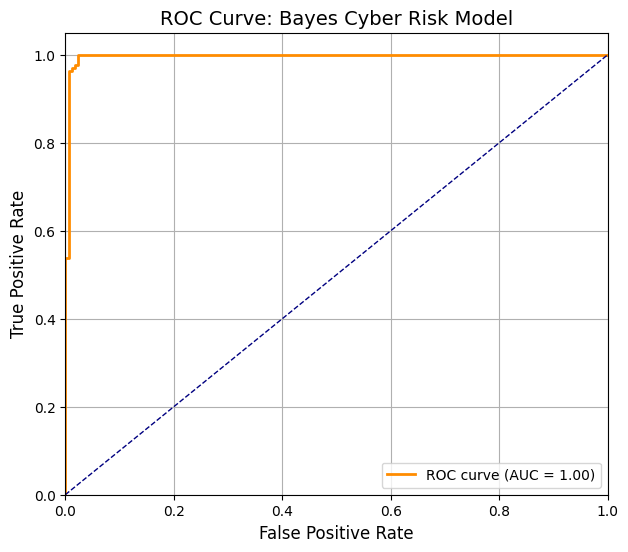

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define true labels: 1 if loss > 5 (arbitrary breach threshold), else 0
y_true = (df['financial_loss'] > 5).astype(int)

# Simulate predicted probabilities (in practice, use your model’s output)
# We'll start with the true label, then add some noise for realism
np.random.seed(42)
y_scores = y_true * 0.8 + (1 - y_true) * 0.2 + np.random.normal(0, 0.15, len(y_true))
y_scores = np.clip(y_scores, 0, 1)  # Probabilities must be between 0 and 1

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve: Bayes Cyber Risk Model', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Create binary target: 1 if financial_loss > 5, else 0
df['breach'] = (df['financial_loss'] > 5).astype(int)

# 2. Feature selection: drop target and any columns that would leak the answer
features = [
    'critical_systems', 'patch_compliance_rate', 'endpoint_security_score',
    'privileged_accounts', 'mfa_coverage', 'past_incidents', 'mttd_hours',
    'phishing_attacks', 'dark_web_exposure', 'training_hours', 'vendor_risk_score',
    'transaction_volume', 'cyber_insurance'
]
X = df[features]
y = df['breach']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train logistic regression (Bayesian version would use e.g. pymc3, but sklearn is fast/simple)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 5. Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# 6. Print summary metrics
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.3f}")

# 7. Example: Show first 10 predicted probabilities and true labels
print("\nSample predictions (first 10):")
for i in range(10):
    print(f"Predicted breach prob: {y_pred_prob[i]:.2f}, Actual: {y_test.iloc[i]}")

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        50
           1       0.83      0.95      0.88        40

    accuracy                           0.89        90
   macro avg       0.89      0.90      0.89        90
weighted avg       0.90      0.89      0.89        90

ROC AUC Score: 0.964

Sample predictions (first 10):
Predicted breach prob: 0.83, Actual: 1
Predicted breach prob: 1.00, Actual: 1
Predicted breach prob: 0.01, Actual: 0
Predicted breach prob: 0.01, Actual: 0
Predicted breach prob: 0.97, Actual: 1
Predicted breach prob: 1.00, Actual: 1
Predicted breach prob: 0.04, Actual: 0
Predicted breach prob: 0.01, Actual: 0
Predicted breach prob: 0.00, Actual: 0
Predicted breach prob: 0.05, Actual: 0


In [ ]:
!pip install pymc arviz --quiet